#GOAL
1. Perform Singular Value Decomposition on an Image.
2. Create a function to show the variation of Culminative energy in the given Eigen Vector basis for any input truncation rank.
3. Use the above function to perform dimensionalty deduction for the image and display the image along with the energy contained and the number of eigen basis vectors used.
4. Show that a good approximation can be achieved even by using small number of eigen vectors.


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
# Let us import an image:
!wget "https://thumbs.dreamstime.com/b/golden-retriever-dog-21668976.jpg"

--2023-07-03 10:36:55--  https://thumbs.dreamstime.com/b/golden-retriever-dog-21668976.jpg
Resolving thumbs.dreamstime.com (thumbs.dreamstime.com)... 151.101.1.91, 151.101.65.91, 151.101.129.91, ...
Connecting to thumbs.dreamstime.com (thumbs.dreamstime.com)|151.101.1.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69224 (68K) [image/jpeg]
Saving to: ‘golden-retriever-dog-21668976.jpg’

golden-retriever-do 100%[===================>]  67.60K  --.-KB/s    in 0.009s  

2023-07-03 10:36:56 (6.98 MB/s) - ‘golden-retriever-dog-21668976.jpg’ saved [69224/69224]



Text(0.5, 1.0, 'Grayscale Image: (534, 800)')

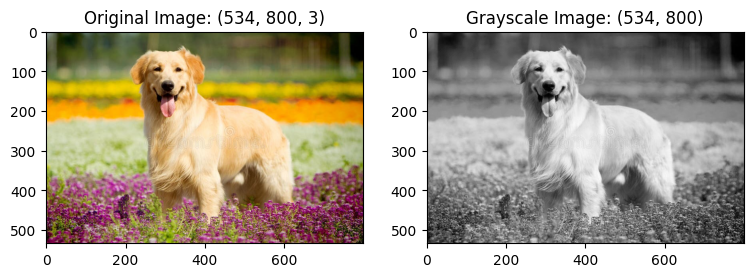

In [3]:
image_path = "/content/golden-retriever-dog-21668976.jpg"
image = cv2.imread(image_path) #This will read the image as BGR
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # We will convert the BGR image to RGB

plt.figure(figsize = (9,9))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title(f'Original Image: {image.shape}')

plt.subplot(1,2, 2)
img = np.mean(image, -1)
plt.imshow(img, cmap = 'gray')
plt.title(f'Grayscale Image: {img.shape}')

*We have converted out image into a 2D array. Now we will use a SVD*

In [4]:
# Using S, V, D for decomposing the original matrix:
(U, S, VT) = np.linalg.svd(img, full_matrices=False) # lin - linear, alg- algbra : keeping full matrix as true, returns all the values of sigma that are even 0

In [5]:
print(U.shape)
print(S.shape)
print(VT.shape)

(534, 534)
(534,)
(534, 800)


In [6]:
# Let us now create a thresh-hold:
def threshold(S, truncation_point):
  s_list = list(S)
  truncated_list = s_list[0:truncation_point]
  reduced_sum = np.sum(truncated_list)
  total_sum = np.sum(s_list)
  fraction = truncation_point/len(s_list)
  fraction_energy = reduced_sum/total_sum
  return truncated_list, (f'Fraction of sigma: {fraction}\nPercentage of Energy: {fraction_energy*100}%')

In [7]:
# Reconstructing the image back from the truncated list:
def reconstruct_img(S, truncation_point):
  truncated_list, statement = threshold(S, truncation_point)
  s_new = np.diag(np.array(truncated_list))
  u_new = U[:, 0:truncation_point]
  v_new = VT[0:truncation_point, :]
  image = np.dot(u_new, (np.dot(s_new, v_new)))
  return image, statement

Text(0.5, 1.0, 'Fraction of sigma: 0.09363295880149813\nPercentage of Energy: 71.71577461039375%')

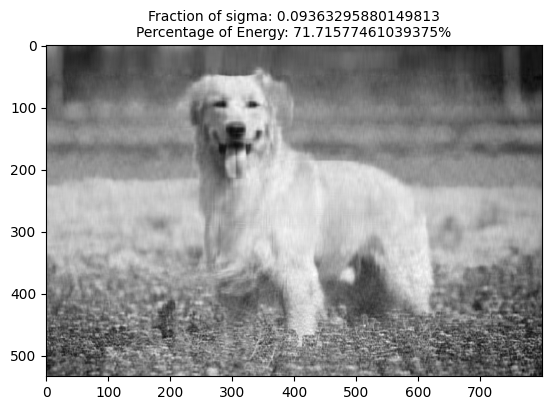

In [15]:
# Let us take only the first 50 of the diagonal elements (Singular values)!
image, statement = reconstruct_img(S, 50)
plt.imshow(image, cmap = 'gray')
plt.title(statement, fontsize = 10)

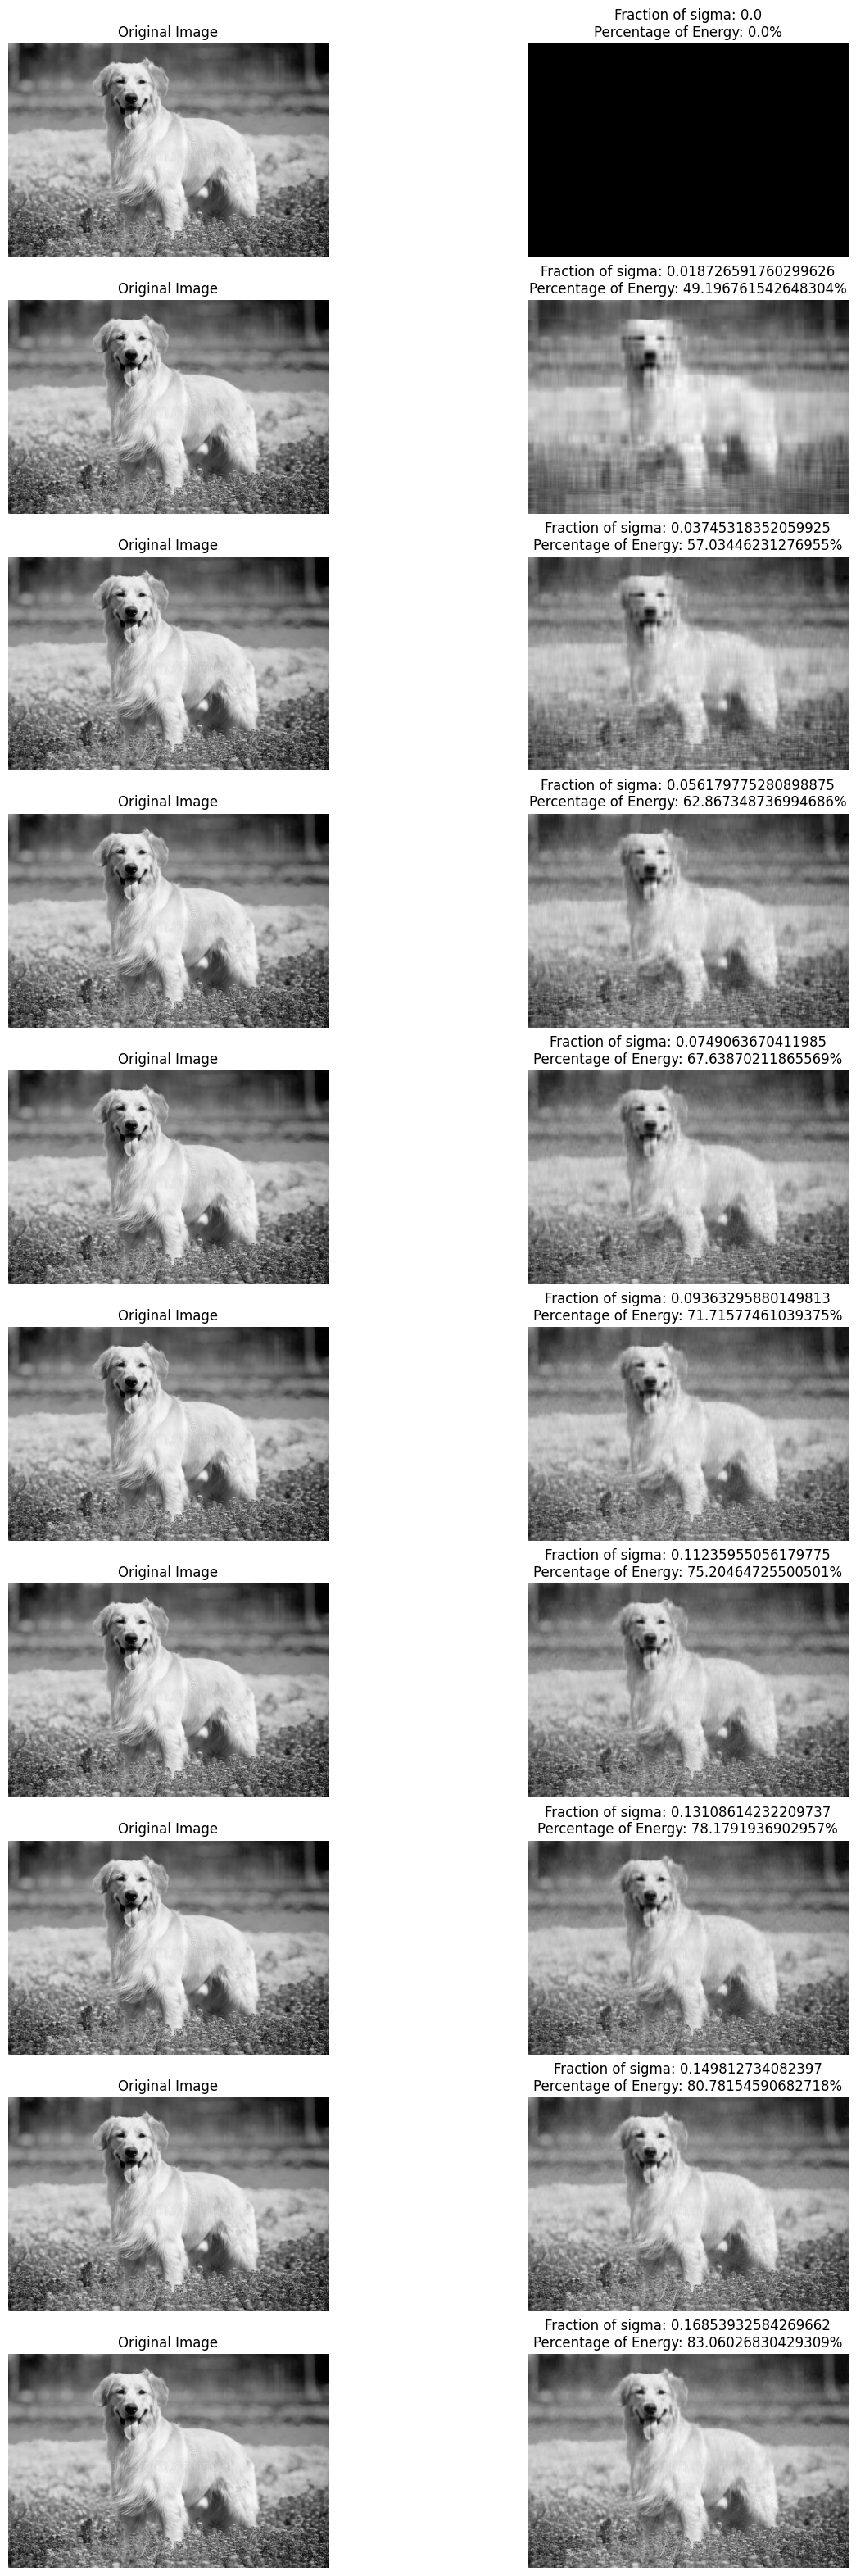

In [20]:
fig, axes = plt.subplots(nrows=10, ncols=2, figsize = (15,40))

for i in range(0, 10):
  image, stat = reconstruct_img(S, i*10)
  axes[i, 0].imshow(img, cmap = 'gray')
  axes[i, 0].set_title('Original Image')
  axes[i, 0].axis('off')

  axes[i, 1].imshow(image, cmap = 'gray')
  axes[i, 1].set_title(stat)
  axes[i, 1].axis('off')


In [21]:
# Let us draw a plot for the energy distribution:
total_energy = np.sum(S)
energy = []
fraction = []
for i in range(len(S)):
  s1 = S[i]
  energy.append(s1)
  s = np.sum(energy)
  fraction.append(s/total_energy)

Text(0, 0.5, 'Fraction of Energy')

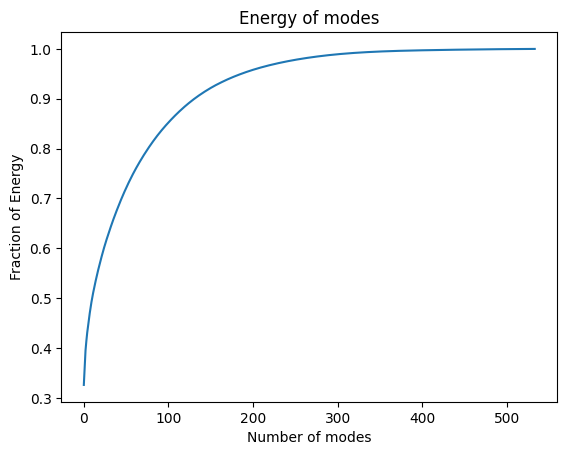

In [22]:
plt.plot(fraction)
plt.title('Energy of modes')
plt.xlabel('Number of modes')
plt.ylabel('Fraction of Energy')

**Around 150 diagonal values of SVD, we would have almost caputer 90% of the information contained in the image**
1. By using say 150 diag values, now we only have to remember (150+533*150+150*800) values, which is equal to 200100.
2. In the original image, we have to remember around 426400 values which is almost double the values in 1, but 1 contains more than 90% info of 2.